In [1]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.family']='NanumGothic' # 한글 폰트 사용
plt.rcParams['axes.unicode_minus'] = False # 한글 폰트 사용시 -값 깨짐 해결

In [2]:
gym = pd.read_csv('gymdata.csv')

In [3]:
gym.head()

,DateTime,Weather,FreeWeight,FreeWeight_PT,RunningMachine,Cycle,PowerRack,PowerRack_PT,SmithMachine,PowerLegPress,...,ShoulderPressMachine,ChestFlyMachine,ChestPressMachine,SeatedRowMachine,LatPullDown,LatPullDown_PT,SitUpBench,SitUpBench_PT,BackExtensionMachine,AssistedPullUpMachine
0,2022-08-17 05:00:49,SUNNY,0,1,2,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,2022-08-17 05:05:33,SUNNY,0,1,2,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2022-08-17 05:10:26,SUNNY,0,0,1,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2022-08-17 05:15:07,SUNNY,0,1,1,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2022-08-17 05:20:08,SUNNY,1,0,2,2,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0


In [4]:
gym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   DateTime               912 non-null    object
 1   Weather                912 non-null    object
 2   FreeWeight             912 non-null    int64 
 3   FreeWeight_PT          912 non-null    int64 
 4   RunningMachine         912 non-null    int64 
 5   Cycle                  912 non-null    int64 
 6   PowerRack              912 non-null    int64 
 7   PowerRack_PT           912 non-null    int64 
 8   SmithMachine           912 non-null    int64 
 9   PowerLegPress          912 non-null    int64 
 10  FlatBench              912 non-null    int64 
 11  InclineBench           912 non-null    int64 
 12  Cable                  912 non-null    int64 
 13  Cable_PT               912 non-null    int64 
 14  HipExtensionMachine    912 non-null    int64 
 15  LegPressMachine        

2022-08-17 부터 2022-10-28 까지

토요일 및 공휴일 제외 평일만 (48일)



In [5]:
gym.shape

(912, 29)

프리 웨이트 공간 (2군데)

런닝머신 20개

사이클 8개

파워렉 3개

케이블 2개

랫풀다운 2개

싯업벤치 2개

외 1개씩

In [6]:
gym.columns

Index(['DateTime', 'Weather', 'FreeWeight', 'FreeWeight_PT', 'RunningMachine',
       'Cycle', 'PowerRack', 'PowerRack_PT', 'SmithMachine', 'PowerLegPress',
       'FlatBench', 'InclineBench', 'Cable', 'Cable_PT', 'HipExtensionMachine',
       'LegPressMachine', 'InnerThighMachine', 'LegExtension', 'LegCurl',
       'ShoulderPressMachine', 'ChestFlyMachine', 'ChestPressMachine',
       'SeatedRowMachine', 'LatPullDown', 'LatPullDown_PT', 'SitUpBench',
       'SitUpBench_PT', 'BackExtensionMachine', 'AssistedPullUpMachine'],
      dtype='object')

## 데이터 전처리

In [7]:
total_equipments = ['FreeWeight', 'FreeWeight_PT', 'RunningMachine',
       'Cycle', 'PowerRack', 'PowerRack_PT', 'SmithMachine', 'PowerLegPress',
       'FlatBench', 'InclineBench', 'Cable', 'Cable_PT', 'HipExtensionMachine',
       'LegPressMachine', 'InnerThighMachine', 'LegExtension', 'LegCurl',
       'ShoulderPressMachine', 'ChestFlyMachine', 'ChestPressMachine',
       'SeatedRowMachine', 'LatPullDown', 'LatPullDown_PT', 'SitUpBench',
       'SitUpBench_PT', 'BackExtensionMachine', 'AssistedPullUpMachine']

In [8]:
# 30분 단위로 군집
def change30m(x):
    if x <= 6:
        return 0
    elif 6 < x <= 12:
        return 1
    else:
        return 2

# 날짜 변환
gym['DateTime'] = pd.to_datetime(gym['DateTime'])
# 하루 19건 순서대로 인덱스 지정
gym['idx'] = list(range(19))*48
# 30분 단위로 나누기
gym['30M'] = gym['idx'].map(change30m)
# 요일
gym['dayOfWeek'] = gym['DateTime'].dt.day_name()

# 총 인원
gym['total'] = gym.loc[:,total_equipments].sum(axis=1)
# 프리웨이트존 총 인원
gym['TotalFreeWeight'] = gym['FreeWeight']+gym['FreeWeight_PT']

# 기구 사용률
gym['USE_RunningMachine'] = round(gym['RunningMachine']/20, 3)
gym['USE_PowerRack'] = round((gym['PowerRack']+gym['PowerRack_PT'])/3, 3)
gym['USE_Cable'] = round((gym['Cable']+gym['Cable_PT'])/2, 3)
gym['USE_LatPullDown'] = round((gym['LatPullDown']+gym['LatPullDown_PT'])/2, 3)
gym['USE_SitUpBench'] = round((gym['SitUpBench']+gym['SitUpBench_PT'])/2, 3)
gym['USE_Cycle'] = round(gym['Cycle']/8, 3)

In [9]:
df = gym[['DateTime','idx','30M','dayOfWeek','total','TotalFreeWeight','USE_RunningMachine','USE_Cycle','USE_PowerRack',
       'USE_Cable', 'USE_LatPullDown', 'USE_SitUpBench', 'SmithMachine', 'PowerLegPress',
       'FlatBench', 'InclineBench', 'HipExtensionMachine',
       'LegPressMachine', 'InnerThighMachine', 'LegExtension', 'LegCurl',
       'ShoulderPressMachine', 'ChestFlyMachine', 'ChestPressMachine',
       'SeatedRowMachine', 'BackExtensionMachine', 'AssistedPullUpMachine']]

In [10]:
df.columns = ['날짜', 'idx','30M', '요일', '총 인원', '프리웨이트존',
       '런닝머신', '사이클', '파워렉', '케이블',
       '랫풀다운', '싯업벤치', '스미스머신', '파워레그프레스',
       '플랫벤치', '인클라인벤치', '힙익스텐션머신', '레그프레스머신',
       '이너싸이머신', '레그익스텐션', '레그컬', '숄더프레스머신',
       '체스트플라이머신', '체스트프레스머신', '시티드로우머신',
       '백익스텐션', '어시스트풀업머신']

In [11]:
equipments = ['런닝머신', '사이클', '파워렉', '케이블',
       '랫풀다운', '싯업벤치', '스미스머신', '파워레그프레스',
       '플랫벤치', '인클라인벤치', '힙익스텐션머신', '레그프레스머신',
       '이너싸이머신', '레그익스텐션', '레그컬', '숄더프레스머신',
       '체스트플라이머신', '체스트프레스머신', '시티드로우머신',
       '백익스텐션', '어시스트풀업머신']

In [12]:
df.head()

,날짜,idx,30M,요일,총 인원,프리웨이트존,런닝머신,사이클,파워렉,케이블,...,레그프레스머신,이너싸이머신,레그익스텐션,레그컬,숄더프레스머신,체스트플라이머신,체스트프레스머신,시티드로우머신,백익스텐션,어시스트풀업머신
0,2022-08-17 05:00:49,0,0,Wednesday,6,1,0.10,0.125,0.333,0.0,...,0,0,0,0,0,0,0,0,0,0
1,2022-08-17 05:05:33,1,0,Wednesday,5,1,0.10,0.125,0.333,0.0,...,0,0,0,0,0,0,0,0,0,0
2,2022-08-17 05:10:26,2,0,Wednesday,5,0,0.05,0.250,0.333,0.5,...,0,0,0,0,0,0,0,0,0,0
3,2022-08-17 05:15:07,3,0,Wednesday,7,1,0.05,0.250,0.333,0.5,...,0,1,0,0,0,0,0,0,0,0
4,2022-08-17 05:20:08,4,0,Wednesday,8,1,0.10,0.250,0.333,0.0,...,0,0,0,0,1,0,0,0,0,0


# 총 인원

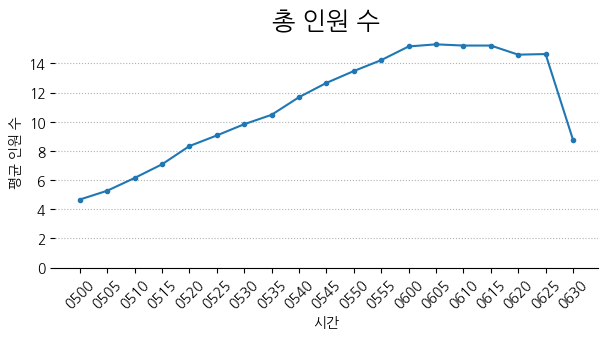

In [13]:
fig, ax= plt.subplots(figsize=(7,3))

ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

df.groupby('idx')['총 인원'].mean().plot(ax=ax, marker='.')

ax.set_ylim(0,)

ax.set_title('총 인원 수', fontsize=18)
ax.set_ylabel('평균 인원 수')
ax.set_xlabel('시간')

ax.set_xticks(list(range(19)))
xticks = ['0500','0505','0510','0515','0520','0525','0530','0535','0540','0545','0550','0555','0600','0605','0610','0615','0620','0625','0630']
ax.set_xticklabels(xticks, rotation=45)


ax.grid(axis='y', linestyle=':', which='major')

plt.show()

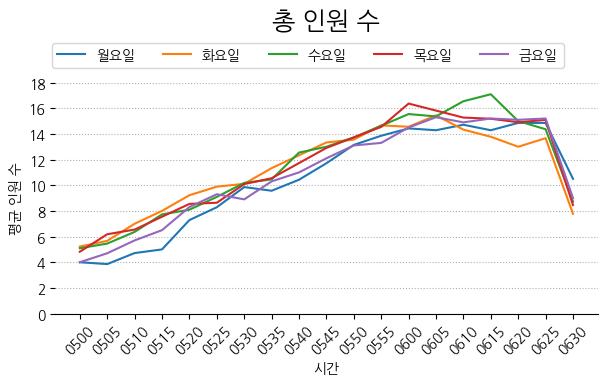

In [14]:
fig, ax= plt.subplots(figsize=(7,3))

ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

DOW = {'Monday':'월요일', 'Tuesday':'화요일', 'Wednesday':'수요일','Thursday':'목요일','Friday':'금요일'}
for i in DOW:
    df[df['요일']==i].groupby('idx')['총 인원'].mean().plot(ax=ax, label=DOW[i])

ax.set_ylim(0,)

ax.set_title('총 인원 수', y=1.2, fontsize=18)
ax.set_ylabel('평균 인원 수')
ax.set_xlabel('시간')

ax.set_xticks(list(range(19)))
xticks = ['0500','0505','0510','0515','0520','0525','0530','0535','0540','0545','0550','0555','0600','0605','0610','0615','0620','0625','0630']
ax.set_xticklabels(xticks, rotation=45)

ax.set_yticks(list(range(0,19,2)))

ax.grid(axis='y', linestyle=':', which='major')

ax.legend(ncol=5, bbox_to_anchor=(0.95,1.2))

plt.show()

# 시간별 평균 사용률

In [15]:
def drawPlot(x):
    fig, ax= plt.subplots(figsize=(7,3))

    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    df.groupby('idx')[x].mean().plot(ax=ax, marker='.')

    ax.set_ylim(0,1)

    ax.set_title(f'{x}')
    ax.set_ylabel('평균 사용률(%)')
    ax.set_xlabel('시간')

    ax.set_xticks(list(range(19)))
    xticks = ['0500','0505','0510','0515','0520','0525','0530','0535','0540','0545','0550','0555','0600','0605','0610','0615','0620','0625','0630']
    ax.set_xticklabels(xticks, rotation=45)

    yticks = ax.get_yticks()
    ax.set_yticks(yticks)
    ax.set_yticklabels([int(i*100) for i in yticks])

    ax.grid(axis='y', linestyle=':', which='major')

    plt.show()

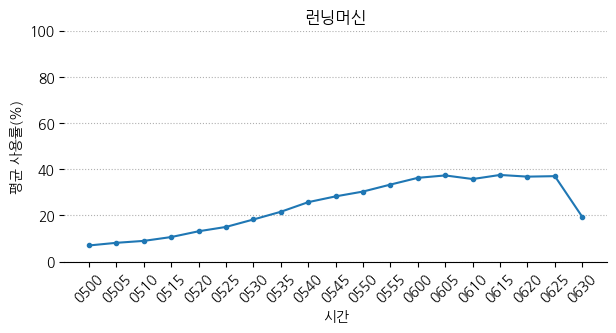

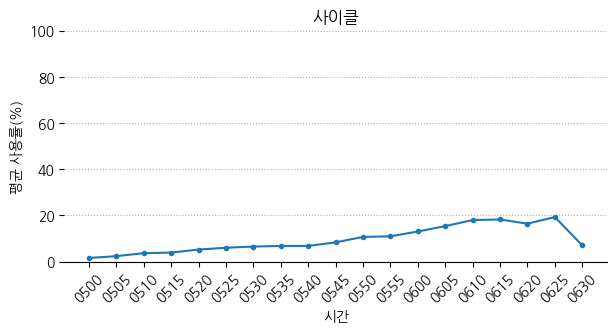

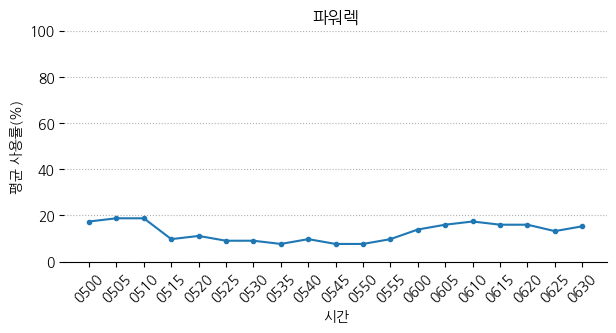

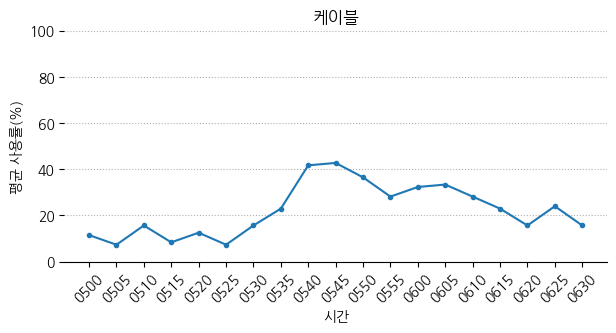

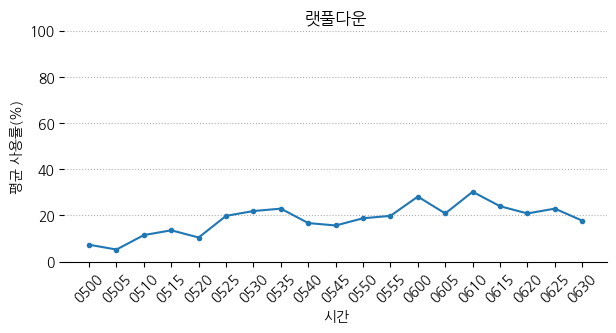

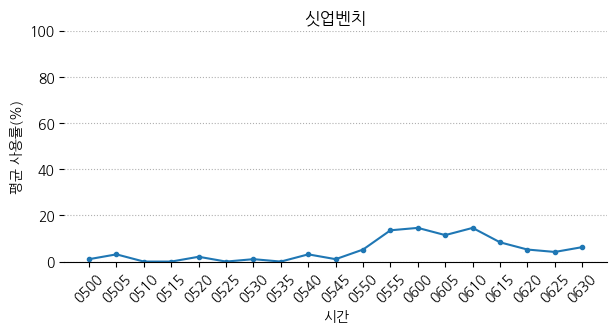

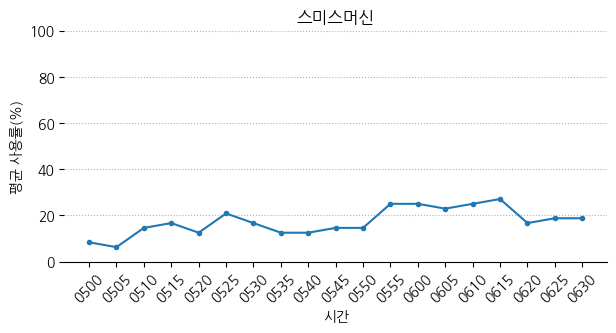

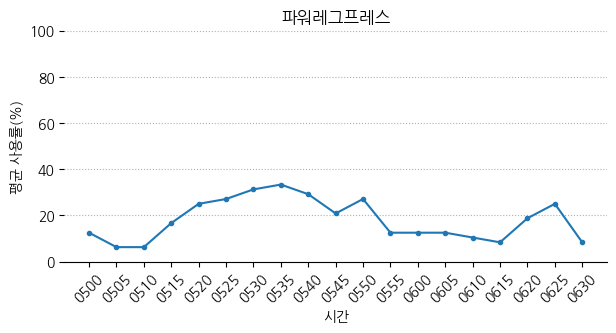

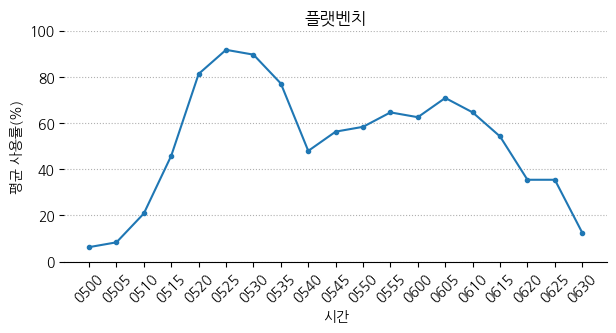

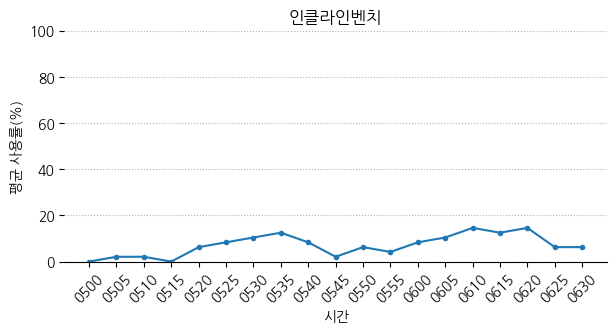

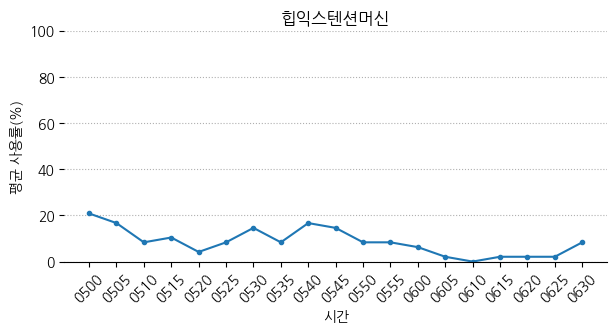

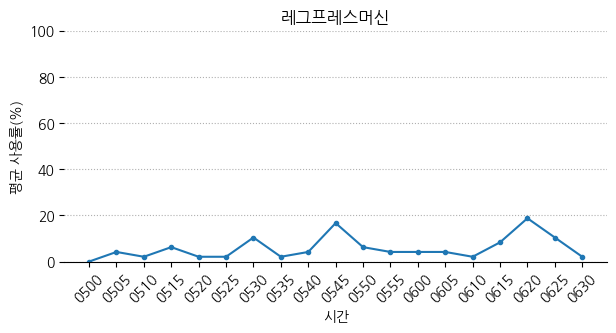

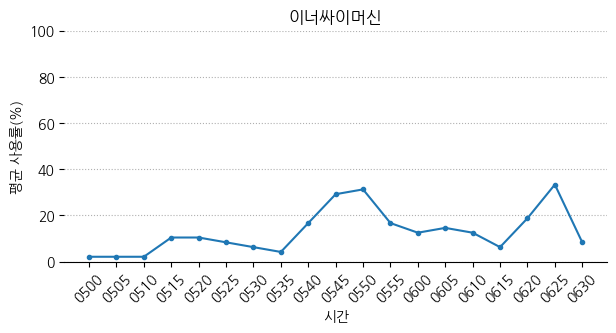

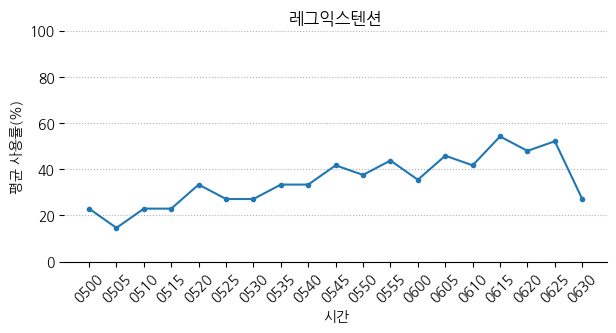

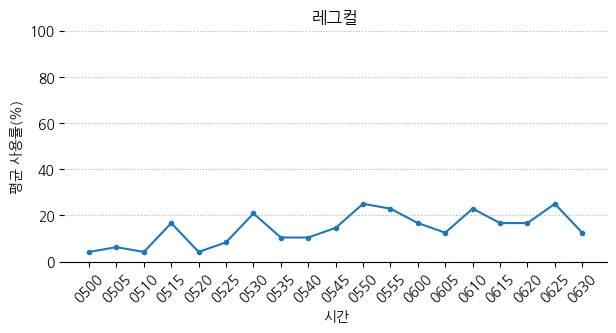

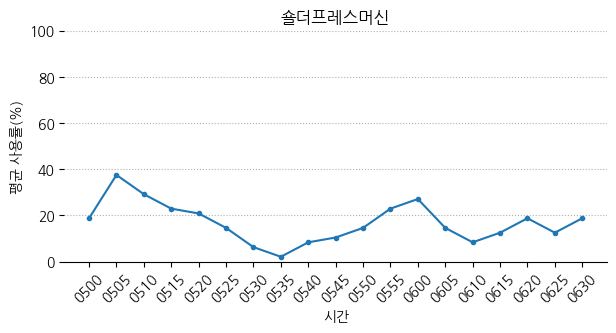

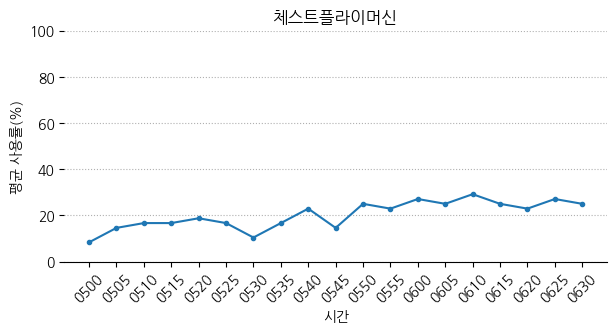

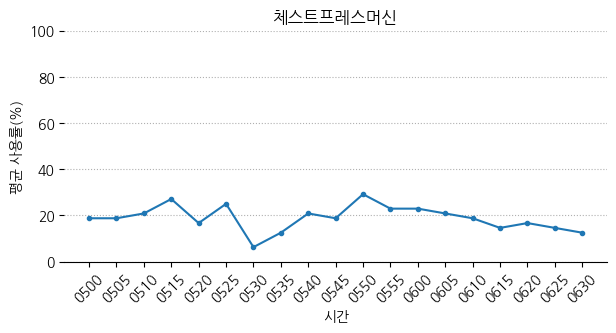

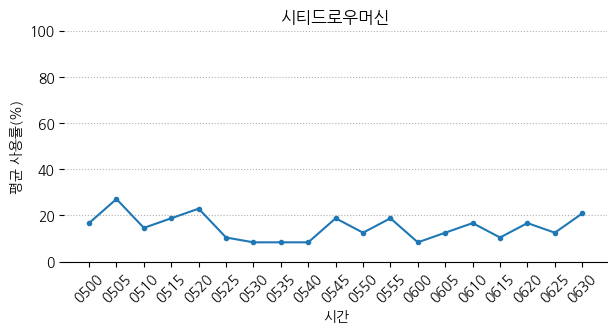

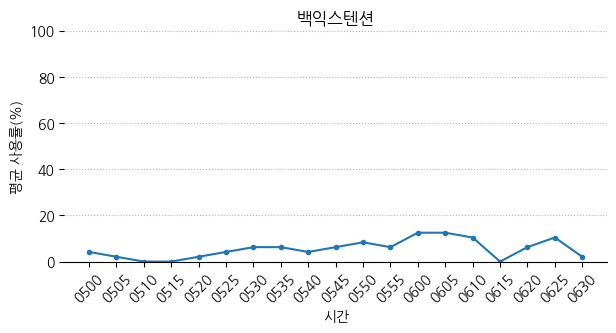

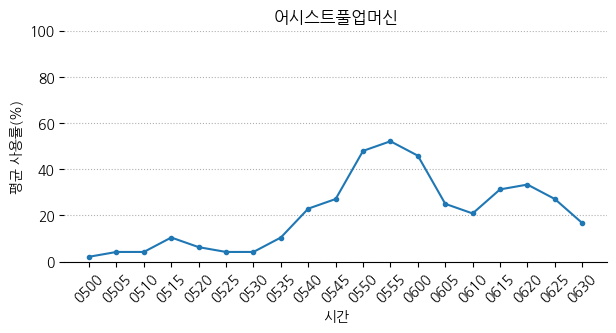

In [16]:
for i in equipments:
    drawPlot(i)

# 요일별 기구 사용률

In [17]:
def weekDrawPlot(x):
    fig, ax= plt.subplots(figsize=(7,3))

    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    DOW = {'Monday':'월요일', 'Tuesday':'화요일', 'Wednesday':'수요일','Thursday':'목요일','Friday':'금요일'}
    for i in DOW:
        df[df['요일']==i].groupby('idx')[x].mean().plot(ax=ax, label=DOW[i])

    ax.set_ylim(0,)

    ax.set_title(f'{x}', y=1.2, fontsize=18)
    ax.set_ylabel('평균 사용률(%)')
    ax.set_xlabel('시간')

    ax.set_xticks(list(range(19)))
    xticks = ['0500','0505','0510','0515','0520','0525','0530','0535','0540','0545','0550','0555','0600','0605','0610','0615','0620','0625','0630']
    ax.set_xticklabels(xticks, rotation=45)

    # ax.set_yticks(list(range(0,19,2)))
    yticks = ax.get_yticks()
    ax.set_yticks(yticks)
    ax.set_yticklabels([int(i*100) for i in yticks])

    ax.grid(axis='y', linestyle=':', which='major')

    ax.legend(ncol=5, bbox_to_anchor=(0.95,1.2))

    plt.show()

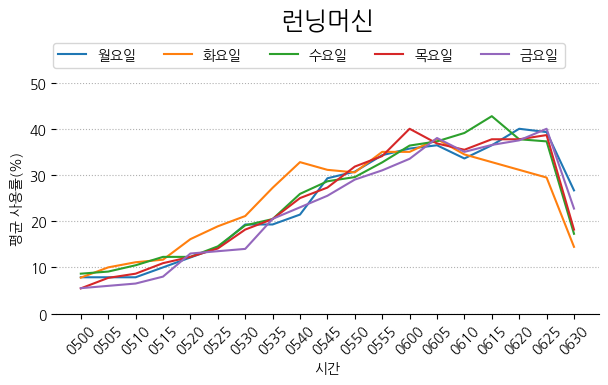

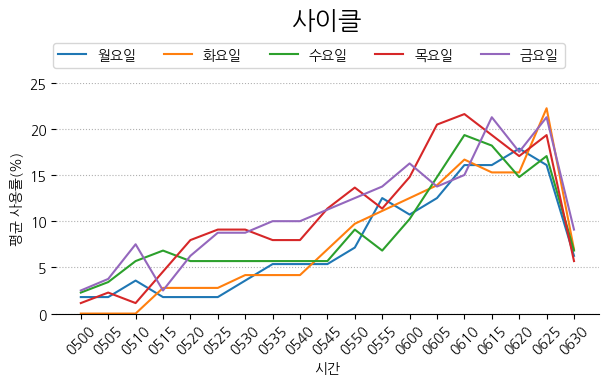

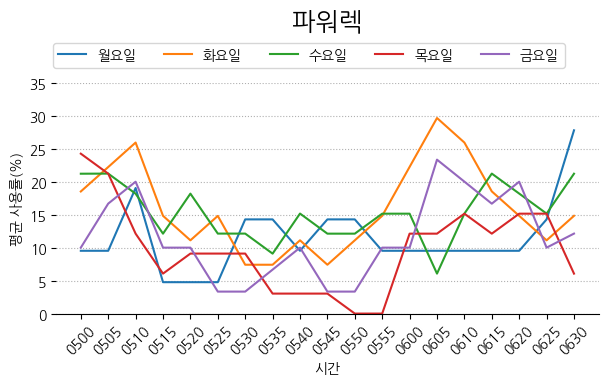

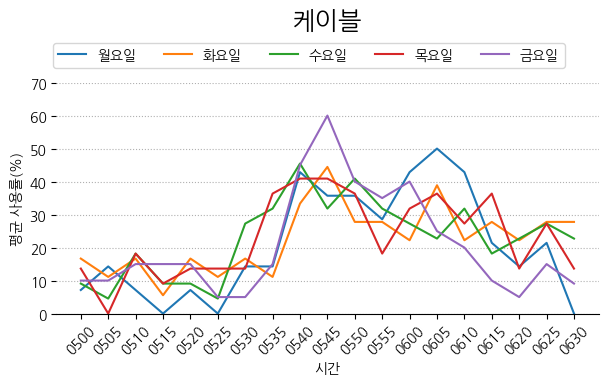

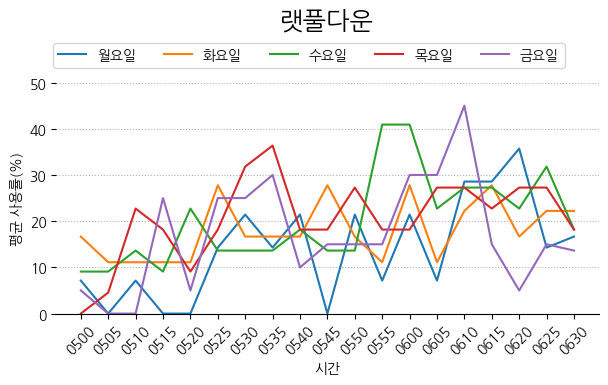

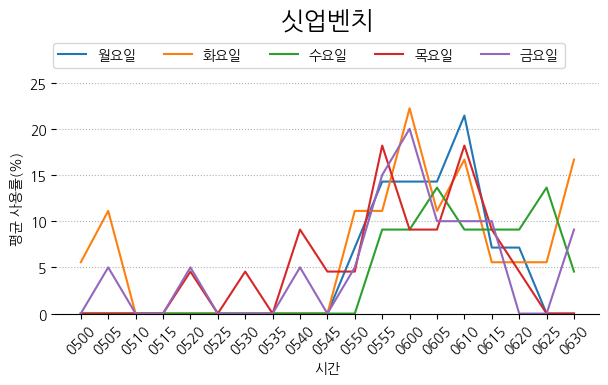

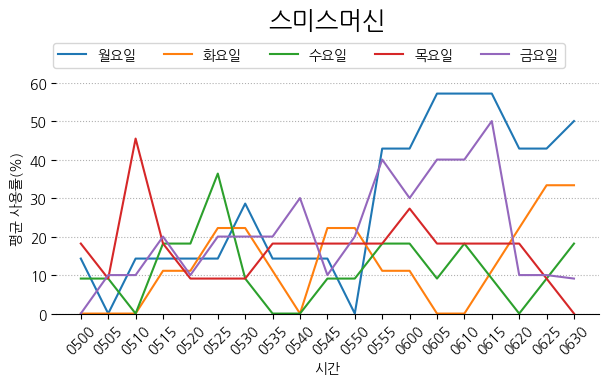

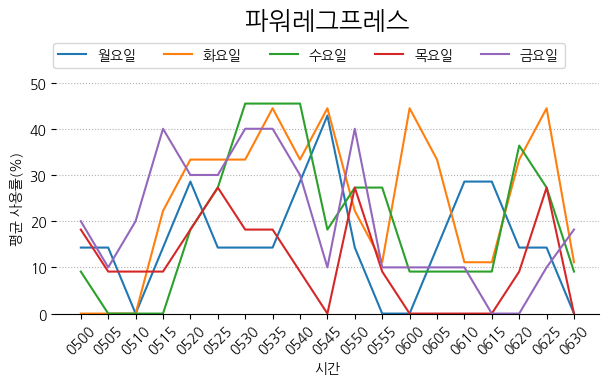

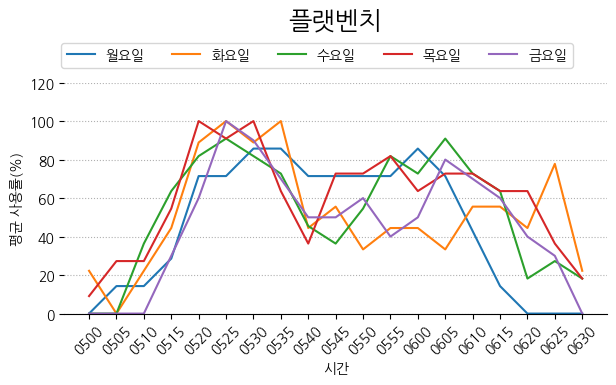

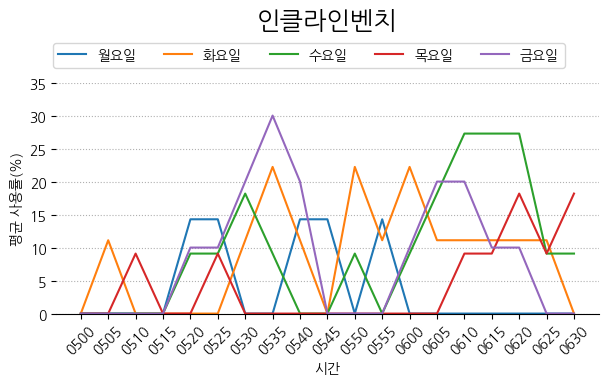

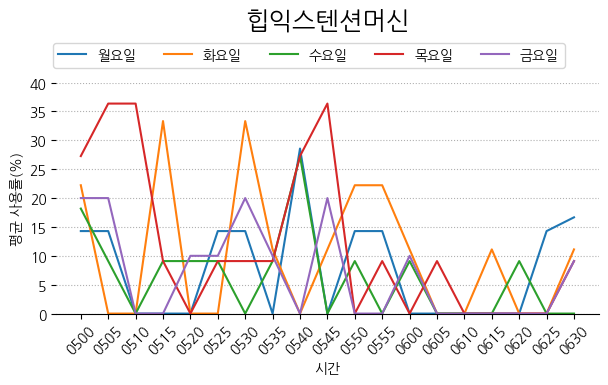

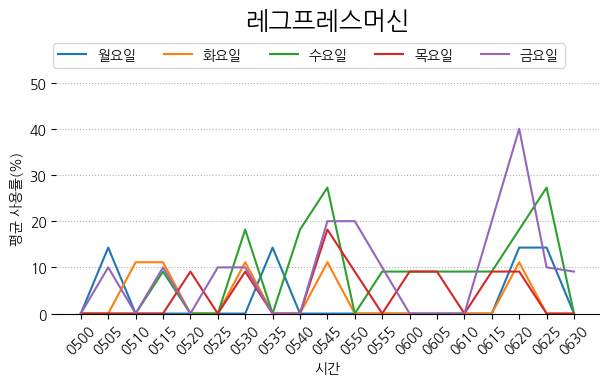

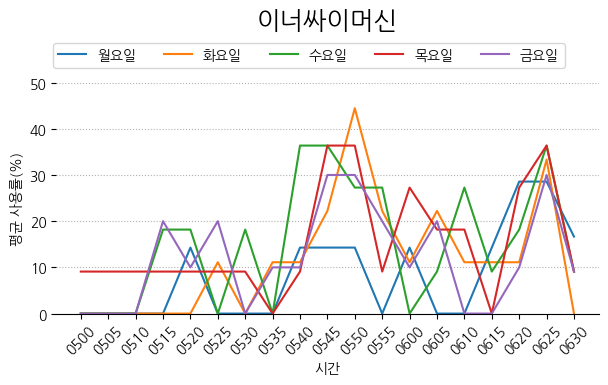

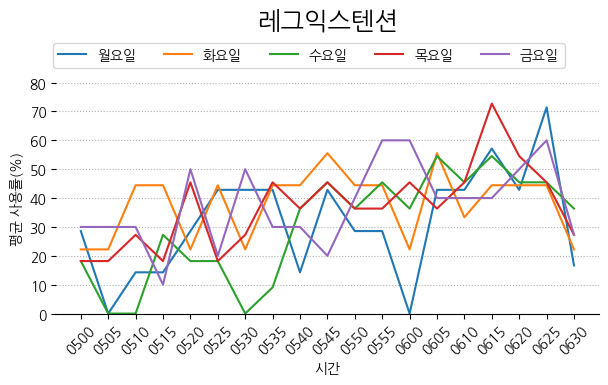

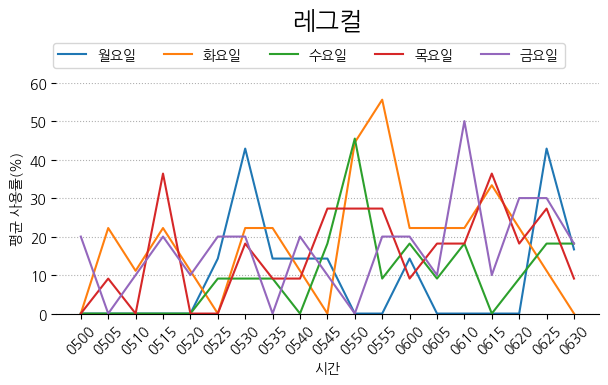

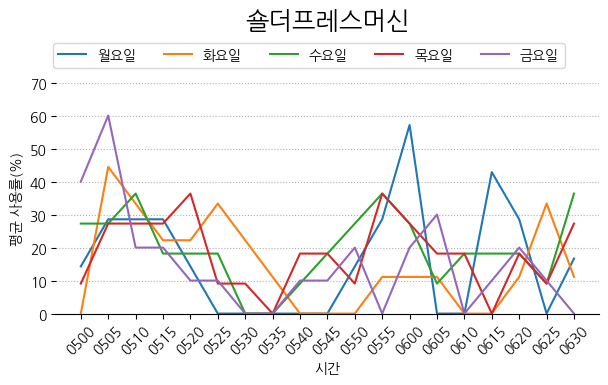

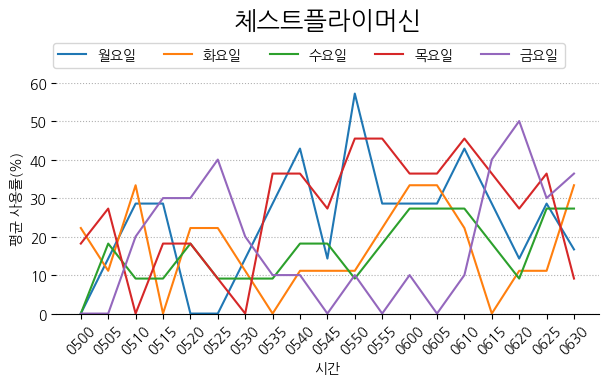

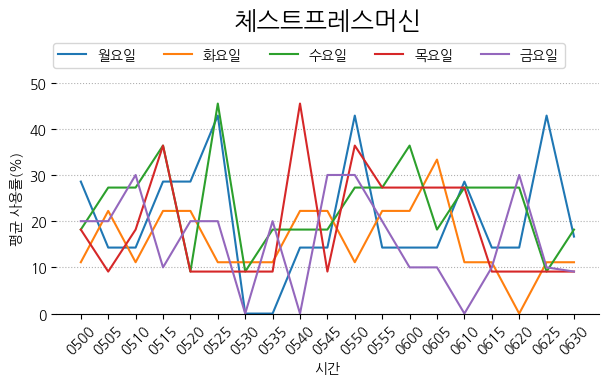

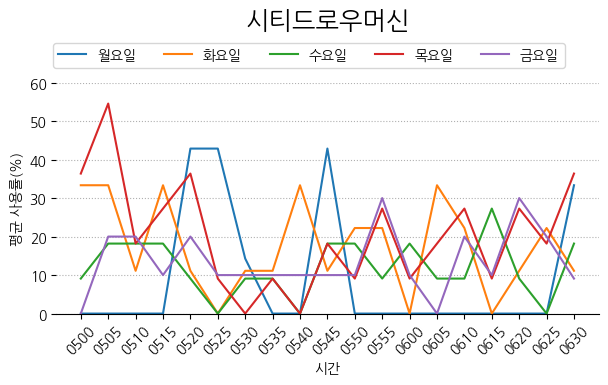

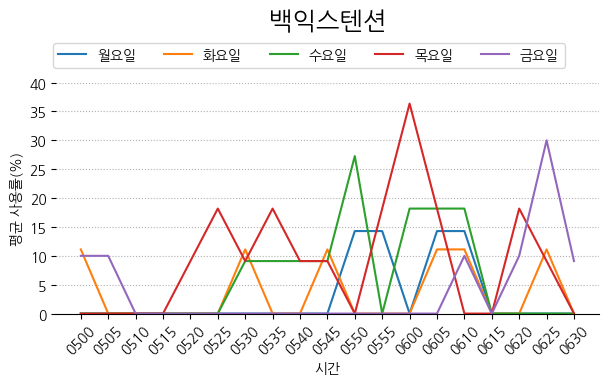

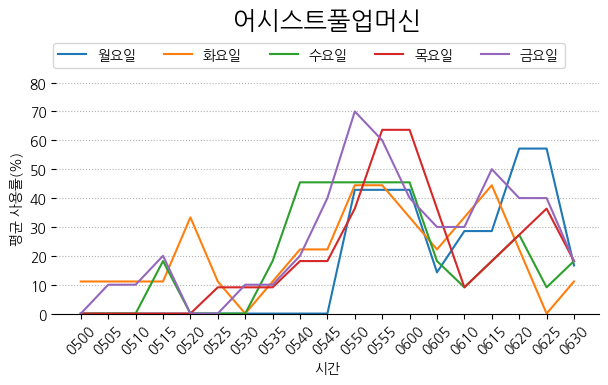

In [18]:
for i in equipments:
    weekDrawPlot(i)

# 시간대별 사용률 비중

In [19]:
def Pie30M(x):
    fig,ax = plt.subplots(figsize=(5,5))

    lab = {0:'0500~0530', 1:'0530~0600', 2:'0600~0630'}
    data = df.groupby('30M')[x].mean()
    ax.pie(data, autopct='%1.1f%%', labels=[lab[i] for i in data.index])

    ax.set_title(f'{x} 사용률 비중 \n 시간대별')

    plt.show()

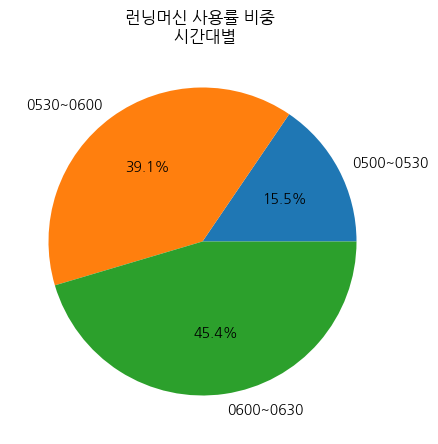

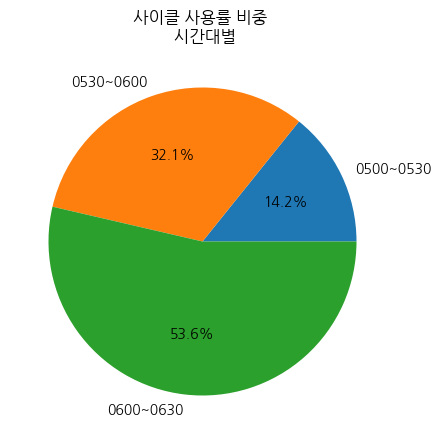

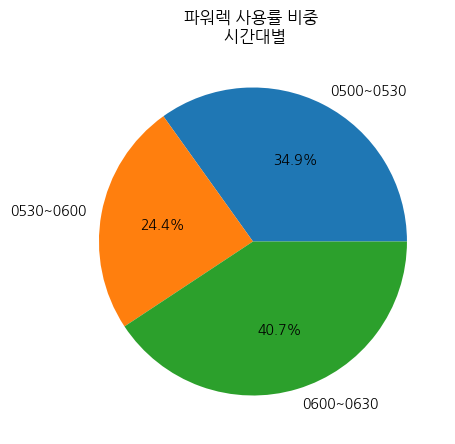

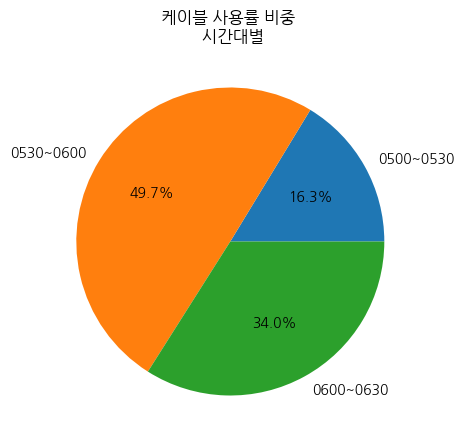

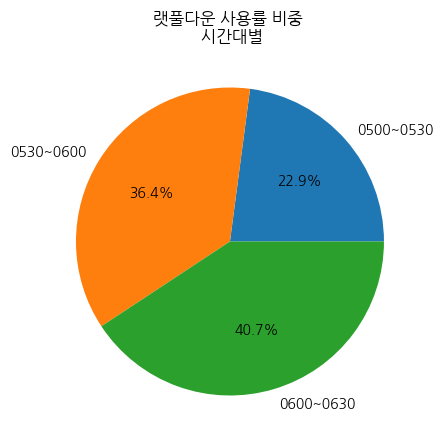

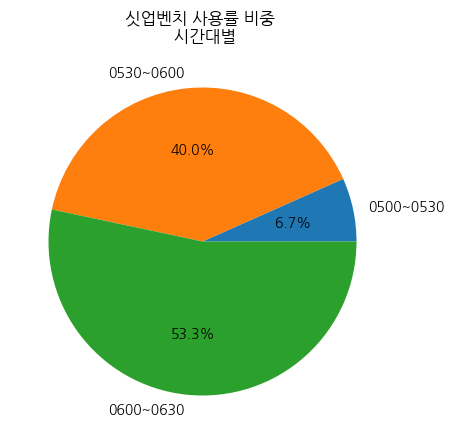

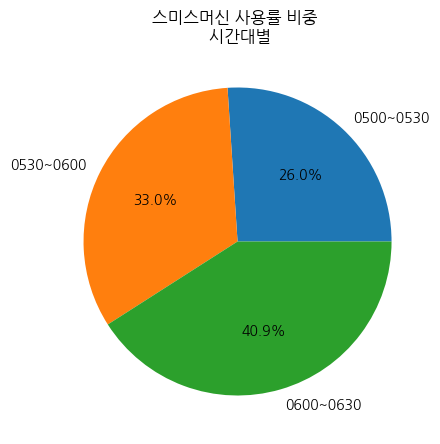

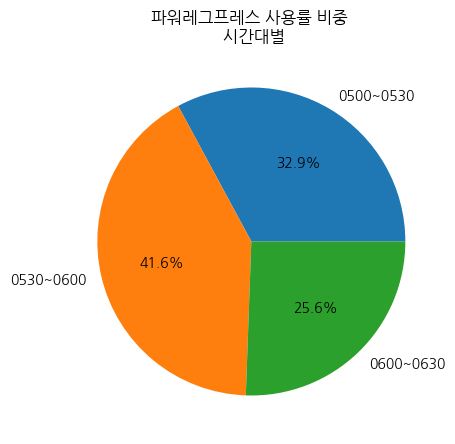

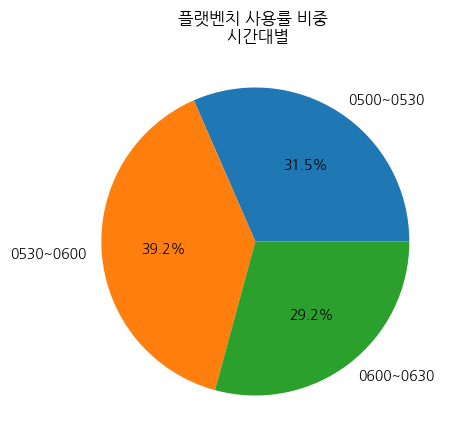

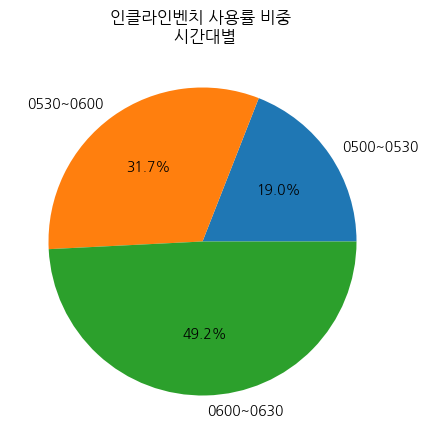

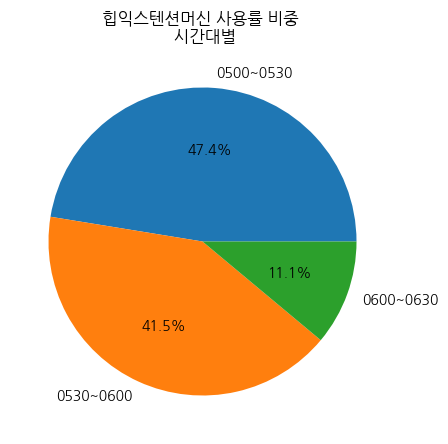

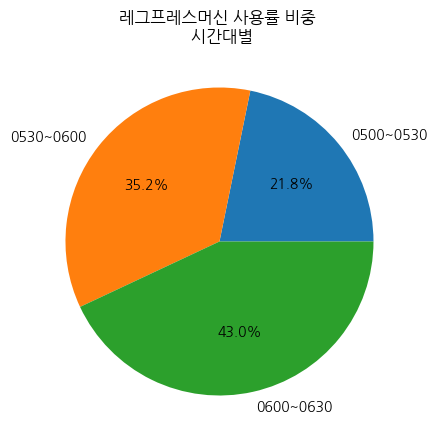

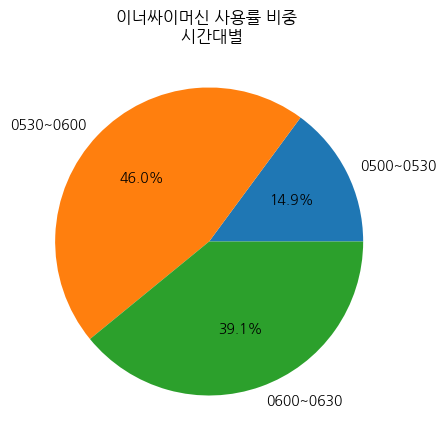

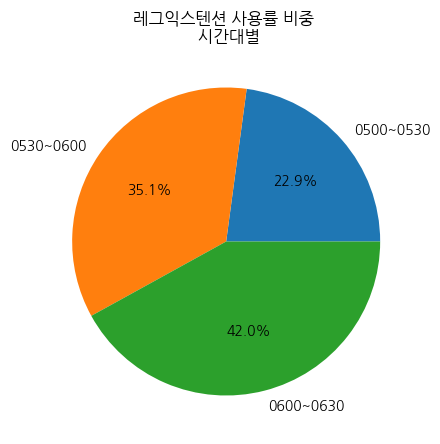

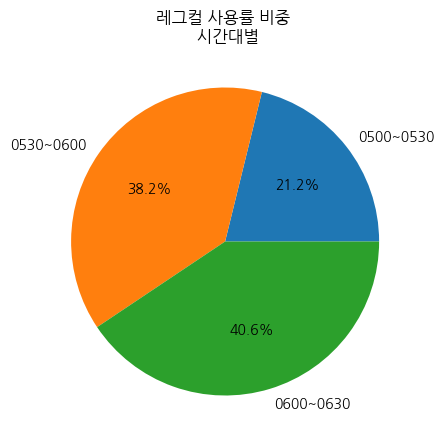

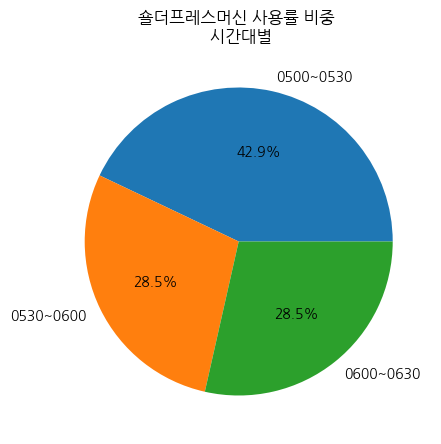

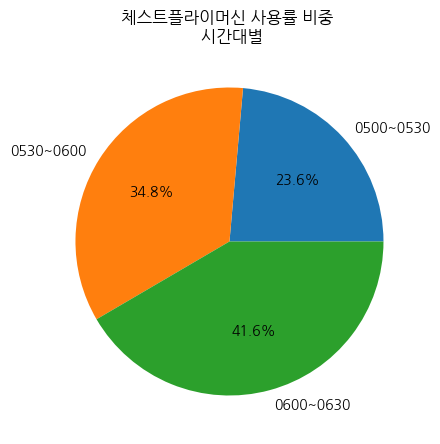

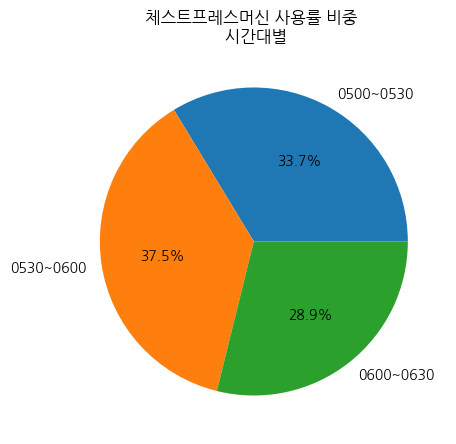

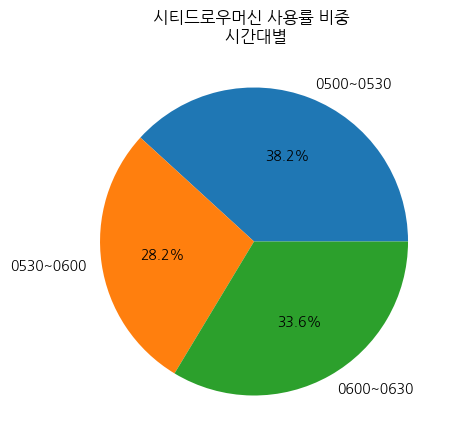

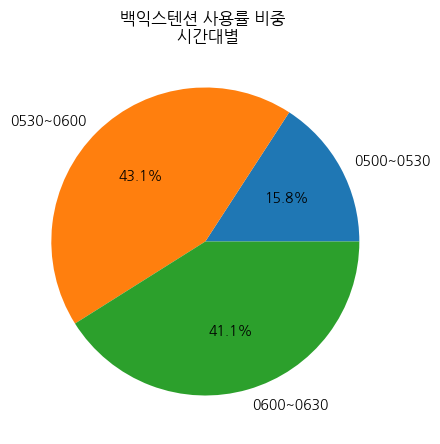

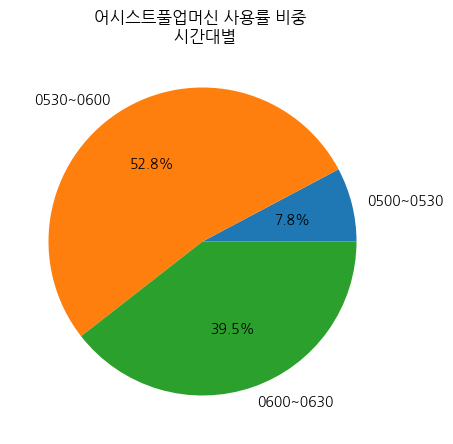

In [20]:
for i in equipments:
    Pie30M(i)

# 요일별 사용률 비중

In [21]:
def PieWeek(x):
    fig,ax = plt.subplots(figsize=(5,5))

    DOW = {'Monday':'월요일', 'Tuesday':'화요일', 'Wednesday':'수요일','Thursday':'목요일','Friday':'금요일'}
    data = df.groupby('요일')[x].mean()
    ax.pie(data, autopct='%1.1f%%', labels=[DOW[i] for i in data.index])

    ax.set_title(f'{x} 사용률 비중 \n -요일별-')

    plt.show()

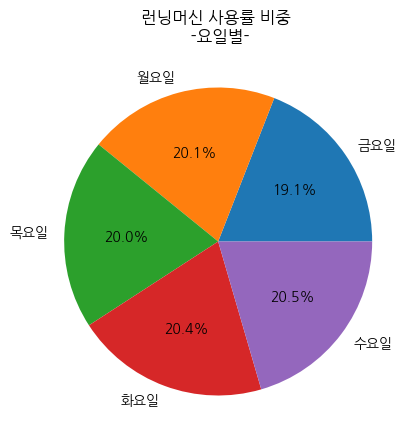

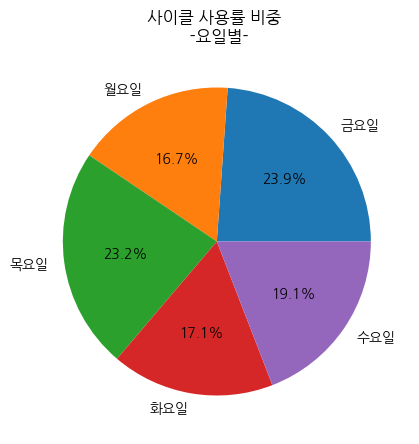

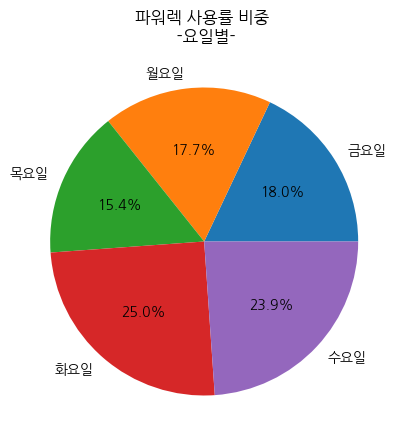

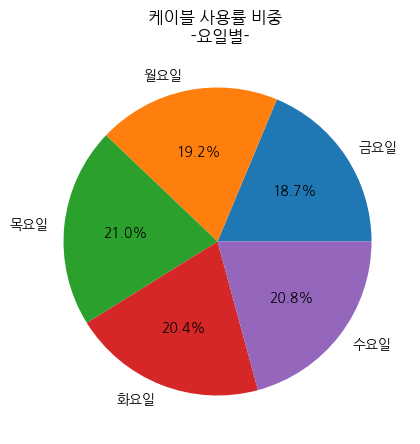

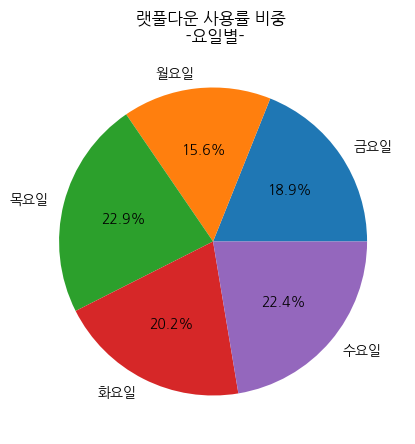

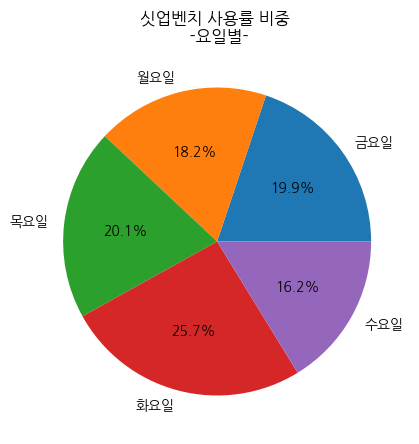

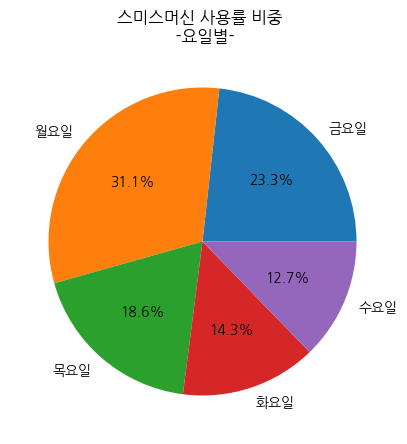

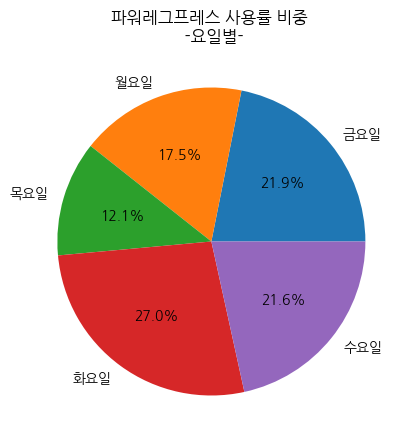

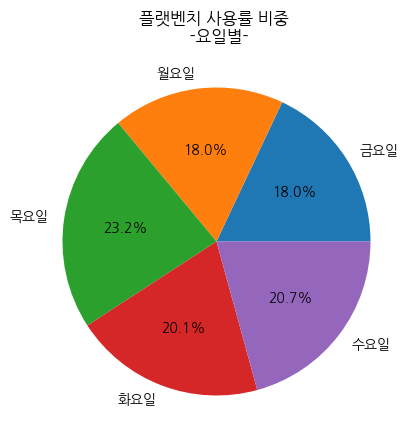

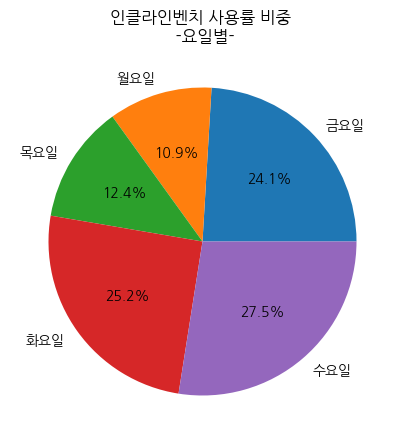

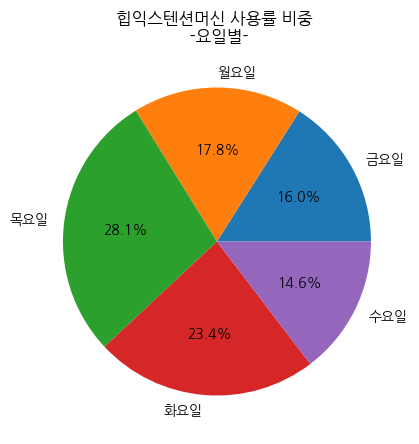

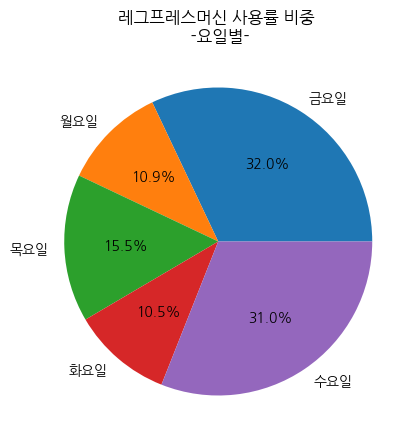

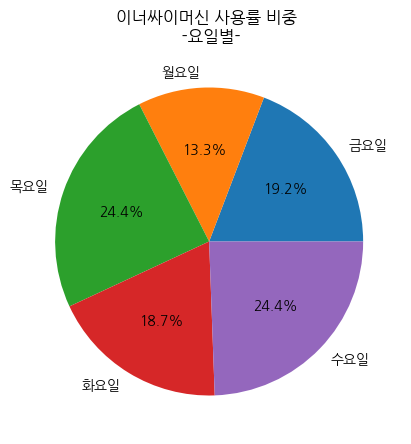

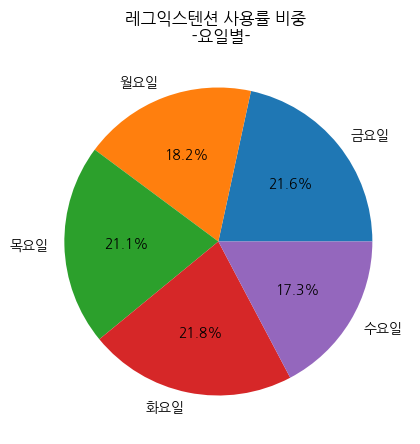

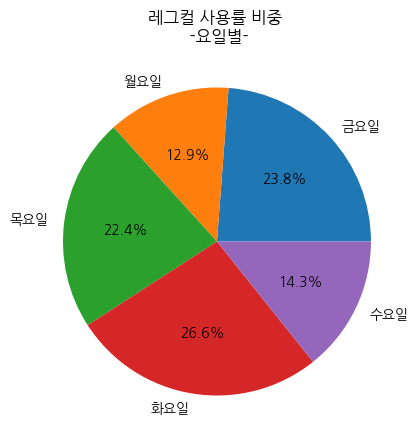

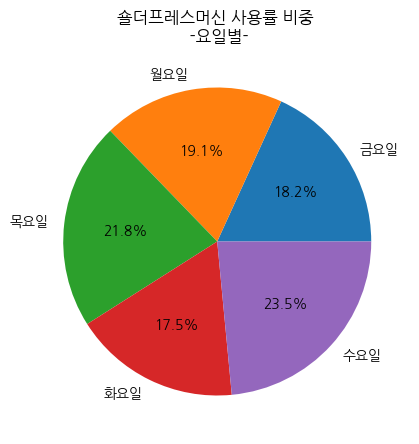

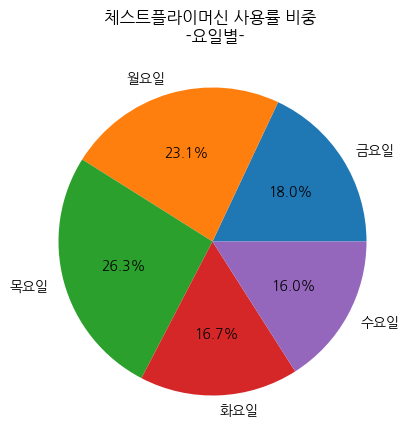

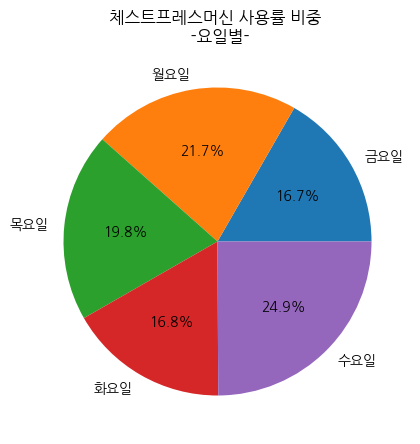

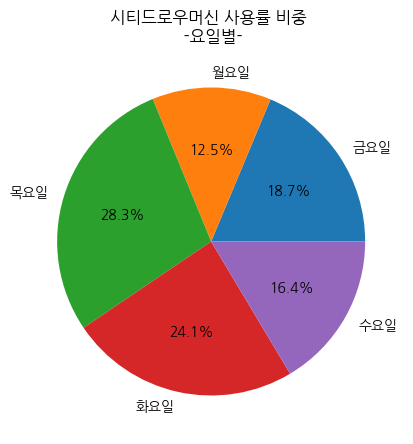

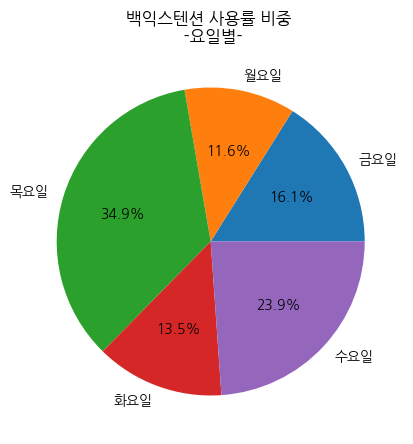

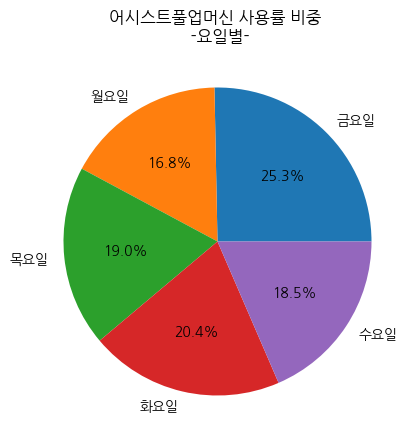

In [22]:
for i in equipments:
    PieWeek(i)